In [1]:
#import library 

import pandas as pd
import numpy as np
import yfinance as yf
import yahoo_fin.stock_info as si 
import matplotlib.pyplot as plt
#instance 
sp500_tickers = si.tickers_sp500()

In [2]:
df = yf.download(sp500_tickers,"2010-1-1")['Adj Close']

[*********************100%***********************]  503 of 503 completed


In [3]:
df2 = yf.download("^GSPC","2010-1-1")['Adj Close']

[*********************100%***********************]  1 of 1 completed


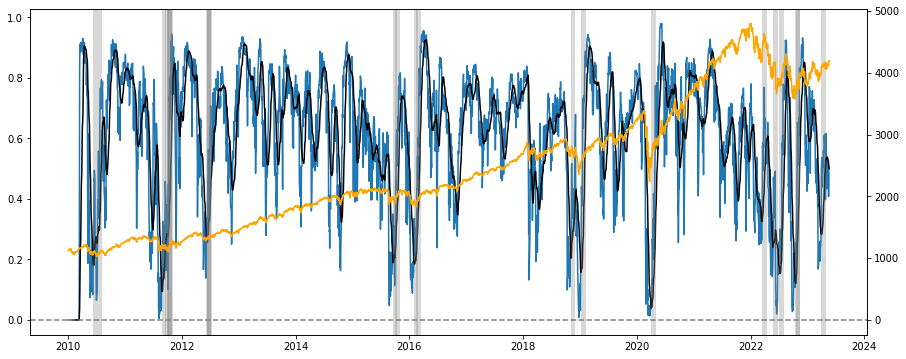

In [7]:


fig = plt.figure(figsize=(15,6)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot()
ax1.plot((df>df.rolling(50).mean()).sum(axis=1)/df.notna().sum(axis=1))
ax1.plot(((df>df.rolling(50).mean()).sum(axis=1)/df.notna().sum(axis=1)).rolling(20).mean(), color = 'black')

ax2 = ax1.twinx()
ax2.axhline(0, color='grey', linestyle='--')
[ax2.axvspan(idx[i], idx[i]+timedelta(30), alpha = 0.3, facecolor ='grey') for i in range(len(idx))]
ax2.plot(df2,color = 'orange')

In [31]:
df3 = pd.DataFrame(columns = [i for i in range(10,30)], index = [i for i in range(2,40)]).fillna(0)

a = (df>df.rolling(50).mean()).sum(axis=1)/df.notna().sum(axis=1)
for j in range(10, 30):
    aa = a.rolling(j).mean()
    idx = a[(((a-aa) * (a-aa).shift(1))<0) & ((a - aa)>0)].index
    for i in range(2,60):
        df3.loc[i,j] = (np.log(df2).diff(i).shift(-i)).loc[idx].mean()

In [5]:
a = (df>df.rolling(50).mean()).sum(axis=1)/df.notna().sum(axis=1)
aa = a.rolling(20).mean()
cond1 = (((a-aa) * (a-aa).shift(1))<0)
cond2 = ((a - aa)>0)
cond3 = a< 0.35

idx = a[cond1 & cond2 & cond3].index

In [6]:
from datetime import timedelta

In [98]:
idx+timedelta(30)

DatetimeIndex(['2015-10-15', '2015-10-31', '2016-02-28', '2016-03-13',
               '2018-12-01', '2019-02-06', '2020-05-02', '2022-04-14',
               '2022-06-25', '2022-07-31', '2022-11-12', '2022-11-16',
               '2023-04-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

0.041723445826814524


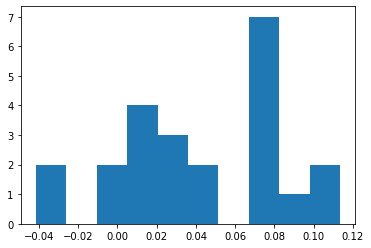

0.04237607515440565


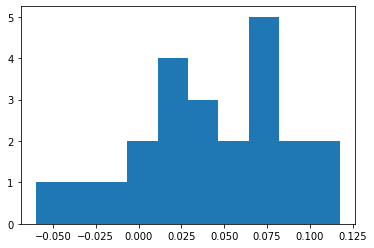

0.043908284841828404


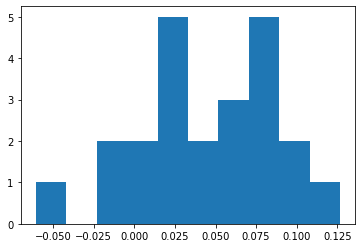

0.04353160173224069


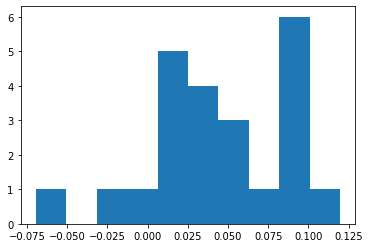

0.04474482202630479


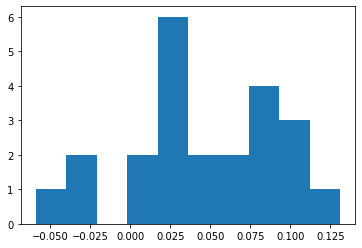

0.041506144638136254


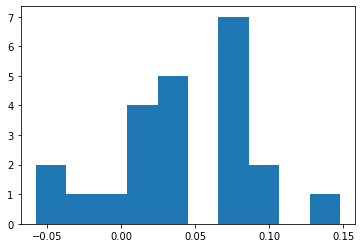

0.04162234906782388


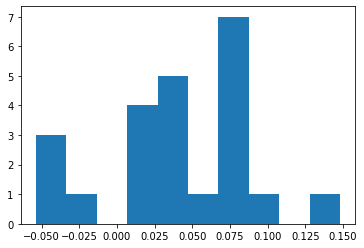

0.04176100413932058


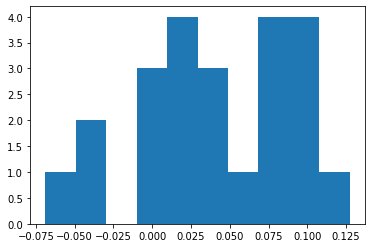

0.04462386220949308


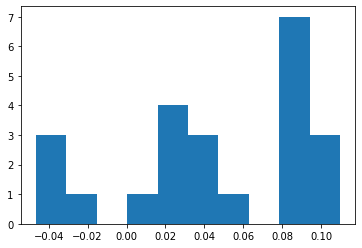

0.04400874315988866


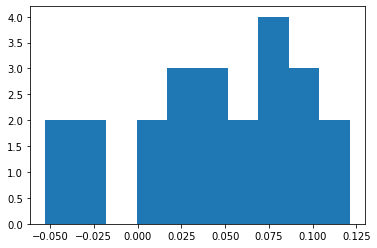

In [8]:
for i in range(20,30):
    plt.hist((np.log(df2).diff(i).shift(-i)).loc[idx])
    print((np.log(df2).diff(i).shift(-i)).loc[idx].mean())
    plt.show()

In [31]:
(df>df.rolling(60).mean()).iloc[-1].value_counts().loc[True]/len(df.index)

0.22705882352941176

In [23]:
df2 = yf.download("^GSPC","2020-1-1")['Adj Close']

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

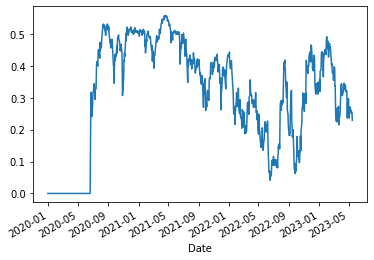

In [25]:
((df>df.rolling(120).mean()).sum(axis=1)/len(df.index)).plot()

In [37]:
df.shape[1]

503

<Axes: xlabel='Date'>

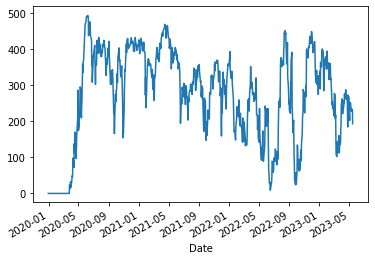

In [34]:
(df>df.rolling(60).mean()).sum(axis=1).plot()

In [58]:
idx = df[(((df>df.rolling(60).mean()).sum(axis=1)/df.shape[1])>((df>df.rolling(60).mean()).sum(axis=1)/df.shape[1]).rolling(20).mean())].dropna().index

In [65]:
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,83.482079,28.574404,149.182922,71.711731,75.632278,80.772392,82.037155,42.889999,200.348083,329.809998,...,137.714386,58.074127,57.606186,54.662392,75.803398,94.929016,141.786621,255.440002,47.107670,129.339401
2020-01-02,84.108368,28.982893,148.484299,73.347939,76.495049,80.829391,82.122162,43.400002,199.948441,334.429993,...,142.405029,57.058807,58.530792,54.990803,76.823204,96.286095,141.331909,259.140015,47.579472,131.088669
2020-01-03,82.757935,27.548195,148.493576,72.634834,75.768967,79.812866,81.121033,43.349998,199.615433,331.809998,...,140.292755,57.333221,58.060242,54.382256,77.275391,95.984512,140.962509,256.049988,46.908070,131.108200
2020-01-06,83.002586,27.219410,146.053162,73.213623,76.366928,80.981392,81.546021,43.520000,198.311951,333.709991,...,140.015091,57.250893,58.506031,54.681705,76.775131,95.927971,140.147858,258.010010,46.336449,130.101669
2020-01-07,83.257011,27.119778,144.320633,72.869293,75.931252,80.401886,81.092690,43.160000,194.030380,333.390015,...,140.679504,57.131981,58.027218,54.971478,76.486481,96.097610,140.024689,256.470001,46.055180,130.541412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-10,128.059998,14.340000,125.800003,173.320267,146.419998,169.014999,110.690002,77.220001,268.890015,344.019989,...,111.500000,69.300003,106.813141,41.029999,106.809998,137.740005,137.419998,271.769989,23.750000,185.139999
2023-05-11,127.660004,14.070000,124.169998,173.510010,146.589996,171.440002,110.050003,77.309998,272.269989,341.579987,...,106.900002,68.620003,104.879921,40.990002,105.120003,137.339996,136.690002,265.279999,22.680000,185.119995
2023-05-12,127.489998,14.020000,122.860001,172.570007,147.149994,170.990005,110.489998,76.900002,277.190002,335.450012,...,105.389999,68.889999,104.870003,40.880001,104.750000,138.509995,136.750000,266.160004,22.430000,183.619995


In [64]:
df[(((df>df.rolling(60).mean()).sum(axis=1)/df.shape[1])>((df>df.rolling(60).mean()).sum(axis=1)/df.shape[1]).rolling(20).mean())].dropna()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-06,147.429825,14.180000,152.116013,129.243622,163.477783,164.728149,111.267632,63.900002,267.064545,332.750000,...,93.570000,70.722305,108.742378,33.305923,110.927757,129.693008,125.460564,273.420013,50.861427,146.978241
2023-01-09,147.230148,14.610000,150.377762,129.772079,158.677994,163.992523,111.089333,62.669998,271.568390,341.980011,...,94.330002,71.406807,106.715698,32.867558,111.446159,129.165451,125.809906,279.290009,50.623295,146.400833
2023-01-10,154.977524,15.190000,150.091354,130.350403,156.695236,166.268951,112.773254,63.070000,272.738983,338.700012,...,97.470001,71.535774,108.309494,33.196331,112.592621,128.807098,125.260948,286.929993,50.643139,153.668121
2023-01-11,157.912750,15.340000,151.385162,133.102386,154.270798,164.410049,112.079872,62.849998,279.980530,342.929993,...,96.239998,72.200432,109.568802,34.979687,114.506714,129.095779,124.083199,299.790009,50.930885,157.192245
2023-01-12,156.235489,16.830000,150.308640,133.022629,150.832443,163.922928,110.806244,63.070000,282.729736,344.540009,...,98.610001,71.377045,111.388878,35.866383,115.832626,128.299438,122.965324,293.000000,51.049953,159.193237
2023-01-13,156.664780,17.020000,149.162979,134.368698,152.199860,163.306610,112.945549,63.759998,281.036407,344.380005,...,100.250000,70.603256,111.320007,36.414341,116.570351,129.623337,123.144981,293.700012,50.990417,160.198715
2023-01-17,155.147247,17.080000,147.365479,135.545273,151.436874,163.187332,112.826149,64.000000,283.765686,344.380005,...,98.010002,70.523888,111.103569,36.683338,115.643211,129.732834,122.775696,293.579987,50.464539,158.854767
2023-01-20,155.666412,16.340000,145.666748,137.469666,148.226410,161.248886,112.258980,62.459999,279.372925,356.380005,...,99.269997,68.004120,111.516769,36.832783,109.841110,126.049789,123.853630,297.029999,51.079716,163.458939
2023-01-23,158.801300,16.170000,146.782761,140.700272,147.195892,160.761795,113.443062,63.130001,278.247345,364.980011,...,100.290001,67.468422,110.936310,37.271149,101.108055,126.089607,125.700111,317.760010,52.240623,166.392639


In [63]:
idx

DatetimeIndex(['2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-17', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-31', '2023-02-01', '2023-02-02',
               '2023-02-13', '2023-03-29', '2023-03-30', '2023-03-31',
               '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06',
               '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13',
               '2023-04-14', '2023-04-17', '2023-04-18', '2023-04-19',
               '2023-04-20', '2023-04-21', '2023-04-24', '2023-04-28',
               '2023-05-01', '2023-05-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [62]:
np.log(df2).diff(20).shift(-20).loc[idx]

Date
2023-01-06    0.053972
2023-01-09    0.067530
2023-01-10    0.049433
2023-01-11    0.027797
2023-01-12    0.026579
2023-01-13    0.033974
2023-01-17    0.035726
2023-01-20    0.026451
2023-01-23   -0.005605
2023-01-24   -0.006469
2023-01-25   -0.000972
2023-01-26   -0.022513
2023-01-27   -0.021936
2023-01-31   -0.031196
2023-02-01   -0.034040
2023-02-02   -0.032614
2023-02-13   -0.054130
2023-03-29    0.026349
2023-03-30    0.028870
2023-03-31    0.014150
2023-04-03   -0.001196
2023-04-04   -0.002405
2023-04-05   -0.007154
2023-04-06    0.007579
2023-04-10    0.007035
2023-04-11    0.002487
2023-04-12    0.011104
2023-04-13   -0.003770
2023-04-14   -0.003283
2023-04-17   -0.003630
2023-04-18   -0.010882
2023-04-19         NaN
2023-04-20         NaN
2023-04-21         NaN
2023-04-24         NaN
2023-04-28         NaN
2023-05-01         NaN
2023-05-05         NaN
Name: Adj Close, dtype: float64

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-08',
               '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12',
               '2023-05-15', '2023-05-16'],
              dtype='datetime64[ns]', name='Date', length=850, freq=None)

In [87]:
idx = a[(a>aa)&(((a-aa) * (a-aa).shift(1))<0)].index

In [91]:
np.log(df2).diff(20).shift(-20).loc[idx]

Date
2020-07-15    0.046563
2020-07-29    0.065419
2020-08-05    0.073295
2020-08-07    0.022331
2020-08-28   -0.045611
2020-09-02   -0.057485
2020-10-02   -0.023711
2020-11-05    0.052351
2020-12-15    0.026949
2020-12-31    0.004725
2021-01-06    0.032444
2021-01-13    0.027581
2021-01-20    0.015999
2021-02-08   -0.010307
2021-02-12    0.008631
2021-02-24   -0.009288
2021-03-09    0.051426
2021-04-23   -0.005833
2021-05-27    0.018823
2021-07-02    0.007969
2021-07-09    0.015210
2021-07-23    0.006750
2021-08-23   -0.028379
2021-10-07    0.061761
2021-10-14    0.046448
2021-12-07    0.002947
2021-12-15   -0.010849
2021-12-21   -0.036469
2022-01-11   -0.027074
2022-02-08   -0.055395
2022-02-15   -0.025647
2022-02-25    0.035491
2022-03-16    0.020156
2022-04-13   -0.123478
2022-04-19   -0.087380
2022-05-26   -0.039646
2022-07-01    0.073876
2022-08-25   -0.128374
2022-09-09   -0.111104
2022-10-13    0.075160
2022-10-17    0.073194
2022-12-12   -0.005264
2023-01-06    0.053972
2023-0

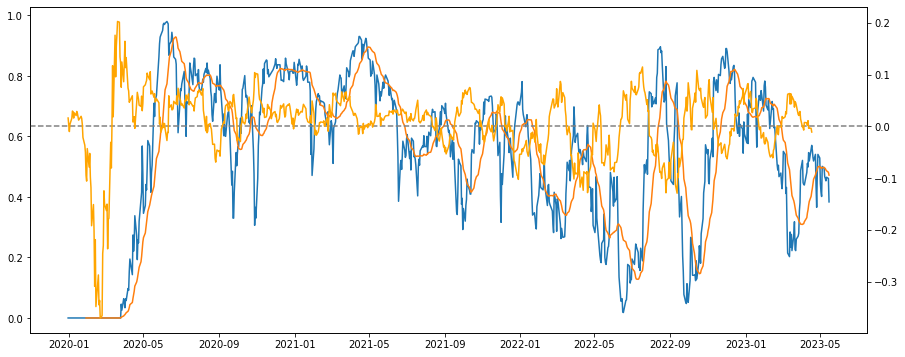

In [52]:
fig = plt.figure(figsize=(15,6)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot()
ax1.plot((df>df.rolling(60).mean()).sum(axis=1)/df.shape[1])
ax1.plot(((df>df.rolling(60).mean()).sum(axis=1)/df.shape[1]).rolling(20).mean())

ax2 = ax1.twinx()
ax2.axhline(0, color='grey', linestyle='--')
ax2.plot(np.log(df2).diff(20).shift(-20),color = 'orange')

In [40]:
import numpy as np

In [44]:
np.log(df2).diff(20).shift(-20)

Date
2019-12-31    0.016235
2020-01-02   -0.009973
2020-01-03    0.004340
2020-01-06    0.015682
2020-01-07    0.029677
                ...   
2023-05-10         NaN
2023-05-11         NaN
2023-05-12         NaN
2023-05-15         NaN
2023-05-16         NaN
Name: Adj Close, Length: 850, dtype: float64

<Axes: xlabel='Date'>

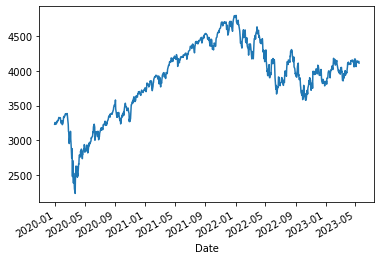

In [26]:
df2.plot()